In [1]:
import numpy as np

#### 1. Решите линейную систему:

In [3]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])

In [4]:
#найдем определитель матрицы A
det_A = np.linalg.det(A)
print(det_A)

59.999999999999986


Так определитель не равен нулю, то мы можем найти решение СЛАУ

In [6]:
X1 = np.linalg.solve(A, B)
X2 = np.dot(np.linalg.inv(A), B)
print(X1)
print(X2)

[-9.2         0.9         6.46666667]
[-9.2         0.9         6.46666667]


In [7]:
#проверка
print(np.dot(A, X1))
print(np.dot(A, X2))

[12.  2.  1.]
[12.  2.  1.]


#### 2. Найдите псевдорешение:

$x + 2y – z = 1$

$3x – 4y = 7$

$8x – 5y + 2z = 12$

$2x – 5z = 7$

$11x +4y – 7z = 15$

In [8]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
print(A)

[[ 1  2 -1]
 [ 3 -4  0]
 [ 8 -5  2]
 [ 2  0 -5]
 [11  4 -7]]


In [9]:
print(B)

[ 1  7 12  7 15]


In [11]:
X = np.linalg.lstsq(A, B, rcond=None)[0]
print(X)

[ 1.13919353 -0.90498444 -0.9009803 ]


In [12]:
#проверка
print(np.dot(A, X))

[ 0.23020495  7.03751834 11.83650981  6.78328855 15.21805313]


#### 3. Сколько решений имеет линейная система:

In [14]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
C = np.concatenate((A, B.T), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Так как ранг матрицы A меньше ранга расширенной матрицы C, то система не имеет решения.

Изменим вектор правой части так, чтобы система стала совместной, и решим ее:

In [16]:
B = np.array([[2, 2, 2]])
C = np.concatenate((A, B.T), axis=1)
print(C)
np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)

[[1 2 3 2]
 [4 5 6 2]
 [7 8 9 2]]


(2, 2)

Система имеет бессконечное множество решений, так как ранг её основной матрицы равен рангу расширенной матрицы и ранг меньше числа неизвестных. 

#### 4. Вычислите LU-разложение матрицы:

In [17]:
import scipy
import scipy.linalg

In [20]:
A = np.array([[1,2,3],[2,16,21],[4,28,73]])
print(A)

[[ 1  2  3]
 [ 2 16 21]
 [ 4 28 73]]


In [21]:
# LU-разложение матрицы a
P, L, U = scipy.linalg.lu(A)
print(f'P: \n{P}')
print(f'L: \n{L}')
print(f'U: \n{U}')

P: 
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L: 
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U: 
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [23]:
det_A = np.linalg.det(A)
print(det_A)

432.00000000000017


In [24]:
B = np.array([2, 2, 2])

In [25]:
X = np.linalg.solve(A, B)
print(X)

[ 2.37037037 -0.07407407 -0.07407407]


In [27]:
#проверка
print(np.dot(A, X))

[2. 2. 2.]


#### 5. Найдите нормальное псевдорешение недоопределенной системы:
#### Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])

In [30]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

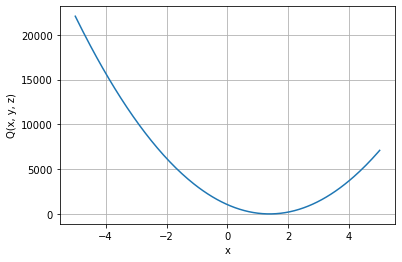

In [31]:
#приближение №1
x = np.linspace(-5, 5, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

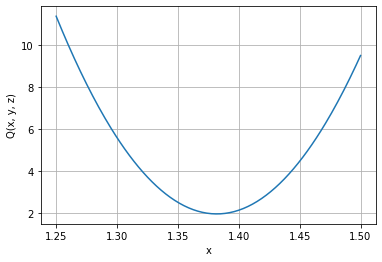

In [32]:
#приближение №2
x = np.linspace(1.25, 1.5, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

In [33]:
# исходя из визуального анализа графика:
x = 1.37
y = 10 * x - 14
z = x + 2 * y - 1

X1 = np.array([x, y, z])
print(X1)

[ 1.37 -0.3  -0.23]


In [34]:
# нормальное псевдорешение числовым методом:
X2 = np.linalg.lstsq(A, B, rcond=None)[0]
print(X2)

[ 1.38191882 -0.18081181  0.0202952 ]


In [35]:
# проверка:
print(np.dot(A, X1))
print(np.dot(A, X2))

[ 1. 12.]
[ 1. 12.]


#### 6. Найдите одно из псевдорешений вырожденной системы:
#### Попробуйте также отыскать и нормальное псевдорешение.

In [36]:
import scipy.optimize

In [37]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([[2,5,11]])
c = np.concatenate((a, b.T), axis=1)

In [38]:
det_a = np.linalg.det(a)
print(det_a)

6.66133814775094e-16


In [39]:
q, r = np.linalg.qr(A)
print(f'Q: \n{q}')
print(f'R: \n{r}')

Q: 
[[-0.12403473 -0.99227788]
 [-0.99227788  0.12403473]]
R: 
[[-8.06225775  4.71331991 -1.86052102]
 [ 0.         -2.60472943  1.24034735]]


In [40]:
rank_A = np.linalg.matrix_rank(a)
rank_C = np.linalg.matrix_rank(c)
n = a.shape[1]
rank_A, rank_C, n

(2, 3, 3)

In [ ]:
#cистема не имеет решений

In [42]:
x = np.linalg.lstsq(a, b.flatten(), rcond=None)[0]
print(x)

[ 1.25  0.5  -0.25]


In [44]:
# проверка
print("Норма (псевдорешение):", x[0]**2 + x[1]**2 + x[2]**2)
a@x-b

Норма (псевдорешение): 1.8749999999999925


array([[-0.5,  1. , -0.5]])

In [45]:
# найдем нормальное псевдорешени:
def Q(x):
    y = 2.5 - 2 * x
    z = x - 1
    return (x**2 + y**2 + z**2)

In [46]:
x = scipy.optimize.minimize(Q, (0)).x[0]
y = 2.5 - 2 * x
z = x - 1
x, y, z

(0.9999999934100475, 0.500000013179905, -6.589952472602079e-09)

In [47]:
# проверка
print("Норма (нормальное псевдорешение):", x**2 + y**2 + z**2)
x = np.array([x, y, z])
a@x-b

Норма (нормальное псевдорешение): 1.2500000000000002


array([[0. , 1.5, 0. ]])